### SGD(stochastic gradient descent) : 確率的勾配降下法

In [1]:
class SGD:
    def __init__(self, lr=0.01) -> None:
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

        return params

### Momentum : 運動量
Momentumはボールが地面を転がり落ちるようなイメージを持ったアルゴリズム

$ v \leftarrow \alpha v - \eta \frac{\delta L}{\delta W} $

$ W \leftarrow W + v $

In [2]:
import numpy as np


class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum  # \alpha
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] -= self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

        return params

### AdaGrad
AdaGradは学習が進むにつれて、学習係数を小さくすることで、目的値の近くでは細かく勾配計算を行えるようにするアルゴリズム

$ h \leftarrow \frac{\delta L}{\delta W} \bigodot \frac{\delta L}{\delta W} $

$ W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\delta L}{\delta W} $

In [4]:
from math import sqrt


class AdaGrad:

    def __init__(self, lr=0.01) -> None:
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * (grads[key] / (np.sqrt(self.h[key]) + 1e-7))

        return params

### 隠れ層のアクティベーション分布

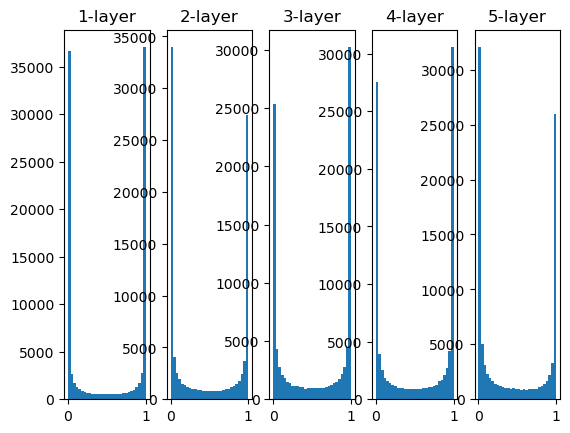

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100)  # 1000個のデータ

node_num = 100  # 各隠れ層のノード(ニューロン)の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]

    w = np.random.randn(node_num, node_num)

    z = np.dot(x, w)
    a = sigmoid(z)  # シグモイド関数 -> 活性化関数
    activations[i] = a

# ヒストグラムを表示
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i + 1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

epoch:0, train acc:0.06666666666666667, test acc:0.0793
epoch:1, train acc:0.1, test acc:0.0981
epoch:2, train acc:0.13, test acc:0.1154
epoch:3, train acc:0.17, test acc:0.1292
epoch:4, train acc:0.20666666666666667, test acc:0.1493
epoch:5, train acc:0.22666666666666666, test acc:0.1678
epoch:6, train acc:0.25666666666666665, test acc:0.1806
epoch:7, train acc:0.2633333333333333, test acc:0.1942
epoch:8, train acc:0.31666666666666665, test acc:0.2184
epoch:9, train acc:0.3433333333333333, test acc:0.2378
epoch:10, train acc:0.36666666666666664, test acc:0.2584
epoch:11, train acc:0.41, test acc:0.2872
epoch:12, train acc:0.42, test acc:0.3058
epoch:13, train acc:0.43, test acc:0.3125
epoch:14, train acc:0.44666666666666666, test acc:0.3311
epoch:15, train acc:0.48, test acc:0.3469
epoch:16, train acc:0.48333333333333334, test acc:0.3614
epoch:17, train acc:0.49, test acc:0.3615
epoch:18, train acc:0.5033333333333333, test acc:0.3743
epoch:19, train acc:0.51, test acc:0.3812
epoch:20,

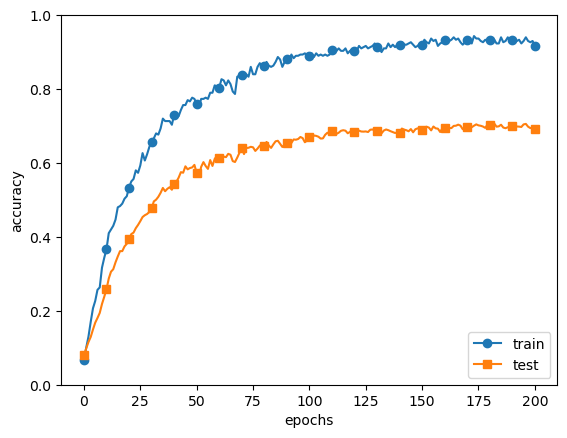

In [7]:
import os, sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decoy (加重減衰)の設定
# weight_decay_lambda = 0  # weight decay
weight_decay_lambda = 0.1
network = MultiLayerNet(
    input_size=784,
    hidden_size_list=[100, 100, 100, 100, 100, 100],
    output_size=10,
    weight_decay_lambda=weight_decay_lambda,
)

optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0  # 何エポック学習を行ったのかを計算する

# 学習フェーズ
for i in range(10000000000):
    # サンプルをバッチサイズ分抜き取る処理
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配を求める処理
    grads = network.gradient(x_batch, t_batch)
    # 学習率0.01で確率的勾配降下法を使用する
    optimizer.update(network.params, grads)

    # epoch数がiter_per_epochなったら、現在のモデルの精度を計算する
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(
            "epoch:"
            + str(epoch_cnt)
            + ", train acc:"
            + str(train_acc)
            + ", test acc:"
            + str(test_acc)
        )

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

# グラフの描写
markers = {"train": "o", "test": "s"}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
plt.plot(x, test_acc_list, marker="s", label="test", markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()

### ドロップアウト
新生児の脳における刈り込み的な手法かな<br>
ランダムなニューロンを選んで、そのニューロンを消去することで、その先の信号伝達をストップする。

In [ ]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist()

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropoutの有無、割合の設定
use_dropout = False  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2

network = MultiLayerNetExtend(
    input_size=784,
    hidden_size_list=[100, 100, 100, 100, 100, 100],
    output_size=10,
    use_dropout=use_dropout,
    dropout_ration=dropout_ratio,
)

trainer = Trainer(
    network,
    x_train,
    t_train,
    x_test,
    t_test,
    epochs=301,
    mini_batch_size=100,
    optimizer="sgd",
    optimizer_param={"lr": 0.01},
    verbose=True,
)

trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list